In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
from IPython.core.display import HTML
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
import seaborn as sns
import plotly
import plotly_express as px
import json
import os

In [2]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
response.status_code

200

In [3]:
quake=BS(response.text, 'html.parser')
print(quake.prettify())


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":917793754,"wgRevisionId":917793754,"wgArticleId":11673441,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needing cleanup from July 2017","Articles with obsolete information from July 2017","All Wikipedia articles in 

In [4]:
quake.findAll('table')

[<table class="box-Multiple_issues plainlinks metadata ambox ambox-content ambox-multiple_issues compact-ambox" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="" data-file-height="40" data-file-width="40" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/40px-Ambox_important.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/60px-Ambox_important.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/80px-Ambox_important.svg.png 2x" width="40"/></div></td><td class="mbox-text"><div class="mbox-text-span"><div class="mw-collapsible" style="width:95%; margin: 0.2em 0;"><b>This article has multiple issues.</b> Please help <b><a class="external text" href="https://en.wikipedia.org/w/index.php?title=List_of_deadly_earthquakes_since_1900&amp;action=edit">improve it</a></b> or discuss these issues on the <b><a href="/wiki/Talk:List_of_deadly_eart

In [5]:
table_html = str(quake.find('table', attrs={'class' : 'sortable wikitable'}))
HTML(table_html)



In [6]:
table = pd.read_html(table_html)

In [7]:
quake_df=table[0]
quake_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects  PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA               NaN                 NaN   
1   43.100        NaN   5.9 Muk               NaN                 NaN   
2  -66.000          0    7.7 Mw               NaN                 NaN   
3  100.100          0    6.5 Ms               NaN                 NaN   
4   28.700        NaN   6.4 Muk               NaN                 NaN   

   PDE Total Deaths  Utsu Total Deaths EM-DAT Total Deaths Other Source Deaths  
0               NaN                NaN                 NaN                 NaN  
1               NaN              140.0                 NaN                 NaN  
2               NaN                NaN                 NaN                 NaN  
3               NaN                NaN                 NaN                 NaN  
4               NaN                4.0                 NaN                 NaN

# Replace empty strings with NaN

In [8]:
quake_df=quake_df.replace(r'^\s*$', np.nan, regex=True)
#quake_df=quake_df.replace(regex=r'^\s*$', value='Nan')
quake_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects  PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA               NaN                 NaN   
1   43.100        NaN   5.9 Muk               NaN                 NaN   
2  -66.000          0    7.7 Mw               NaN                 NaN   
3  100.100          0    6.5 Ms               NaN                 NaN   
4   28.700        NaN   6.4 Muk               NaN                 NaN   

   PDE Total Deaths  Utsu Total Deaths EM-DAT Total Deaths Other Source Deaths  
0               NaN                NaN                 NaN                 NaN  
1               NaN              140.0                 NaN                 NaN  
2               NaN                NaN                 NaN                 NaN  
3               NaN                NaN                 NaN                 NaN  
4               NaN                4.0                 NaN                 NaN

# Remove the footnotes from the 'Other Source Deaths' column

In [9]:
quake_df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object')

In [10]:
quake_df=quake_df.rename(columns={'Origin (UTC)': 'Origin_UTC', 'Present-day country and link to Wikipedia article':'Country'})
quake_df=quake_df.rename(columns={'Depth (km)':'Depth_km', 'Secondary Effects':'Secondary_effects','PDE Shaking Deaths':'PDE_shaking_deaths'})
quake_df=quake_df.rename(columns={'PDE Total Deaths':'PDE_total_deaths', 'Utsu Total Deaths':'Utsu_total_deaths'})
quake_df=quake_df.rename(columns={'EM-DAT Total Deaths':'EM_DAT_total_deaths', 'Other Source Deaths':'Other_source_deaths'})

In [11]:
quake_df.columns

Index(['Origin_UTC', 'Country', 'Lat', 'Long', 'Depth_km', 'Magnitude',
       'Secondary_effects', 'PDE_shaking_deaths', 'PDE_total_deaths',
       'Utsu_total_deaths', 'EM_DAT_total_deaths', 'Other_source_deaths'],
      dtype='object')

In [12]:
quake_df.head()


Origin_UTC    Country     Lat     Long Depth_km Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100        5  7.0 MJMA   
1  1900-07-12 06:25     Turkey  40.300   43.100      NaN   5.9 Muk   
2  1900-10-29 09:11  Venezuela  11.000  -66.000        0    7.7 Mw   
3  1901-02-15 00:00      China  26.000  100.100        0    6.5 Ms   
4  1901-03-31 07:11   Bulgaria  43.400   28.700      NaN   6.4 Muk   

  Secondary_effects  PDE_shaking_deaths  PDE_total_deaths  Utsu_total_deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

  EM_DAT_total_deaths Other_source_deaths  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN

for column in quake_df.Other_source_deaths:
    quake_df[column] = quake_df[column].replace(regex=True, to_replace=r'\[.*\]', value=r'')
    #quake_df[column] = quake_df[column].str.replace(r"\[.*\]", "")
    
quake_df.tail(6)

In [13]:
quake_df.Other_source_deaths.unique() #will give unique values- no need to look at all the data in the dataset

array([nan, '3500', '8000+', '46', '164[6]', '1500[6]', '105000', '1404',
       '1', '120', '200', '380', '2041', '33[8]', '45000[9]', '2489[10]',
       '26271[11] 26000[12]', '68', '231000*[13] 283000*[14] 227898*[15]',
       '41', '60[16]', '215', '34', '295', '79', '189', '1115',
       '222,517[17]', '521[19]', '42', '2698', '185', '15894[20]', '150+',
       '111+', '601 (as of October 30, 2011)'], dtype=object)

In [14]:
quake_df['other']=quake_df['Other_source_deaths'].str.replace(r'\(.*\)', '')
quake_df['other']=quake_df['other'].str.strip(' ')
quake_df['other']=quake_df['other'].str.replace(r'\[\d{2}\]', '')
#quake_df['other']=quake_df['Other_source_deaths'].replace(regex=True, to_replace=r'\D\d{2}\D', value=r'')
quake_df['other']=quake_df['other'].replace(regex=True, to_replace=r'\D\d\D', value=r'')
quake_df['other']=quake_df['other'].str.strip('+')
quake_df['other']=quake_df['other'].str.replace(r'\*', '')
quake_df.tail(6)

Origin_UTC                                   Country     Lat  \
1334  2011-03-11 14:46        Japan (see 2011 Tōhoku earthquake)  38.322   
1335  2011-03-24 20:25         Burma (see 2011 Burma earthquake)     NaN   
1336  2011-04-07 14:32  Japan (see April 2011 Miyagi earthquake)    38.2   
1337  2011-09-18 12:40        India (see 2011 Sikkim earthquake)  27.723   
1338  2011-09-23 10:41          Turkey (see 2011 Van earthquake)    38.6   
1339  2018-08-05 19:46         Indonesia (see Lombok earthquake)     NaN   

         Long Depth_km Magnitude Secondary_effects  PDE_shaking_deaths  \
1334  142.369     24.4    9.0 Mw                 T                 NaN   
1335      NaN      NaN    6.8 Mw               NaN                 NaN   
1336    140.0     66.0    7.1 Mw               NaN                 NaN   
1337   88.064     19.7    6.9 Mw                 L                 NaN   
1338     43.5      7.2    7.1 Mw               NaN                 NaN   
1339      NaN     31.0    6.9 Mw               NaN                 NaN   

      PDE_total_deaths  Utsu_total_deaths EM_DAT_total_deaths  \
1334               NaN                NaN                 NaN   
1335               NaN                NaN                 NaN   
1336               NaN                NaN                 NaN   
1337               NaN                NaN                 NaN   
1338               NaN                NaN                 NaN   
1339               NaN                NaN                 NaN   

               Other_source_deaths  other  
1334                     15894[20]  15894  
1335                          150+    150  
1336                           NaN    NaN  
1337                          111+    111  
1338  601 (as of October 30, 2011)    601  
1339                           NaN    NaN

In [15]:
quake_df['Country']=quake_df['Country'].replace(regex=True, to_replace=r'\(.*\)', value=r'')

In [16]:
quake_df.other.unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', '380', '2041', '33', '45000', '2489', '26271 26000',
       '68', '231000 283000 227898', '41', '60', '215', '34', '295', '79',
       '189', '1115', '222,517', '521', '42', '2698', '185', '15894',
       '150', '111', '601'], dtype=object)

In [17]:
#source:https://towardsdatascience.com/dataset-creation-and-cleaning-web-scraping-using-python-part-2-7dce33cddf66 
# regex documentation: https://docs.python.org/3.1/library/re.html#re.sub

In [18]:
quake_df['other']=quake_df['other'].fillna(0)
quake_df.other.unique()

array([0, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', '380', '2041', '33', '45000', '2489', '26271 26000',
       '68', '231000 283000 227898', '41', '60', '215', '34', '295', '79',
       '189', '1115', '222,517', '521', '42', '2698', '185', '15894',
       '150', '111', '601'], dtype=object)

In [19]:
def x (other):
    a=str(other)
    a=a.replace(',', '')
    a=a.split(' ')
    a=[int(i) for i in a]
    a=max(a)
    return(a)
quake_df['other']=quake_df.other.apply(x)
quake_df.other.unique()

array([     0,   3500,   8000,     46,    164,   1500, 105000,   1404,
            1,    120,    200,    380,   2041,     33,  45000,   2489,
        26271,     68, 283000,     41,     60,    215,     34,    295,
           79,    189,   1115, 222517,    521,     42,   2698,    185,
        15894,    150,    111,    601])

First convert all the elements in other column to str because 0 is integer and others are strings
quake_df['other']=quake_df.other.astype(str)
Replace , in 222,517 with nothing so that we get 222517.
then split on space and find max
quake_df.other.unique()

Convert Magnitude to numeric

In [20]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
Origin_UTC             1340 non-null object
Country                1340 non-null object
Lat                    1325 non-null object
Long                   1325 non-null object
Depth_km               1250 non-null object
Magnitude              1339 non-null object
Secondary_effects      373 non-null object
PDE_shaking_deaths     738 non-null float64
PDE_total_deaths       749 non-null float64
Utsu_total_deaths      1027 non-null float64
EM_DAT_total_deaths    559 non-null object
Other_source_deaths    37 non-null object
other                  1340 non-null int64
dtypes: float64(3), int64(1), object(9)
memory usage: 136.2+ KB


In [21]:
quake_df['Magnitude']=quake_df.Magnitude.astype(str)
quake_df['Magnitude']=quake_df.Magnitude.apply(lambda x: x.split(' ')[0])
quake_df.head()

Origin_UTC    Country     Lat     Long Depth_km Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100        5       7.0   
1  1900-07-12 06:25     Turkey  40.300   43.100      NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.000  -66.000        0       7.7   
3  1901-02-15 00:00      China  26.000  100.100        0       6.5   
4  1901-03-31 07:11   Bulgaria  43.400   28.700      NaN       6.4   

  Secondary_effects  PDE_shaking_deaths  PDE_total_deaths  Utsu_total_deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

  EM_DAT_total_deaths Other_source_deaths  other  
0                 NaN                 NaN      0  
1                 NaN                 NaN      0  
2                 NaN                 NaN      0  
3                 NaN                 NaN      0  
4                 NaN                 NaN      0

Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.

In [22]:
quake_df.EM_DAT_total_deaths.unique()

array([nan, '2000', '20000', '2500', '400', '12000', '75000', '923', '20',
       '29980', '1800', '10000', '100', '116', '180000', '1000', '5000',
       '143000', '2925', '200000', '107', '3300', '500', '0', '36', '256',
       '6', '3008', '6000', '3410', '60000', '9', '149', '30000', '32962',
       '249', '980', '200', '3000', '213', '1083', '2824', '3959', '998',
       '1961', '4000', '165', '73', '1400', '233', '27', '5131', '110000',
       '8', '437', '1500', '30', '14', '1200', '455', '7', '13', '1250',
       '39', '53', '160', '28', '191', '57', '131', '4', '25', '23', '38',
       '128', '10[7]|', '80', '2394', '120', '61', '54', '183', '240',
       '177', '19', '47', '11', '271', '29', '15', '41', '24', '150',
       '1086', '66794', '176', '65', '878', '85', '5057', '17', '78',
       '2385', '1', '23000', '50', '2', '10', '922', '420', '573',
       '242000', '16', '3840', '1641', '167', '352', '3', '185', '589',
       '21', '25000', '45', '5', '121', '34', '26', '35

In [23]:
#removes [7]
quake_df['EM_DAT_total_deaths']=quake_df['EM_DAT_total_deaths'].replace(regex=True, to_replace=r'\D\d\D', value=r'')
#removes |
quake_df['EM_DAT_total_deaths']=quake_df['EM_DAT_total_deaths'].replace(regex=True, to_replace=r'\|', value=r'')
#fillna with 0
quake_df['EM_DAT_total_deaths']=quake_df['EM_DAT_total_deaths'].fillna(0)

#convert all to integers
quake_df['EM_DAT_total_deaths']=[int(i) for i in quake_df['EM_DAT_total_deaths']]
quake_df.EM_DAT_total_deaths.unique()


array([     0,   2000,  20000,   2500,    400,  12000,  75000,    923,
           20,  29980,   1800,  10000,    100,    116, 180000,   1000,
         5000, 143000,   2925, 200000,    107,   3300,    500,     36,
          256,      6,   3008,   6000,   3410,  60000,      9,    149,
        30000,  32962,    249,    980,    200,   3000,    213,   1083,
         2824,   3959,    998,   1961,   4000,    165,     73,   1400,
          233,     27,   5131, 110000,      8,    437,   1500,     30,
           14,   1200,    455,      7,     13,   1250,     39,     53,
          160,     28,    191,     57,    131,      4,     25,     23,
           38,    128,     10,     80,   2394,    120,     61,     54,
          183,    240,    177,     19,     47,     11,    271,     29,
           15,     41,     24,    150,   1086,  66794,    176,     65,
          878,     85,   5057,     17,     78,   2385,      1,  23000,
           50,      2,    922,    420,    573, 242000,     16,   3840,
      

In [24]:
quake_df['PDE_total_deaths']=quake_df['PDE_total_deaths'].fillna(0)

quake_df['deaths']=quake_df[['PDE_total_deaths', 'Utsu_total_deaths', 'EM_DAT_total_deaths', 'other']].max(axis=1)
quake_df.head(5)

Origin_UTC    Country     Lat     Long Depth_km Magnitude  \
0  1900-05-11 17:23      Japan  38.700  141.100        5       7.0   
1  1900-07-12 06:25     Turkey  40.300   43.100      NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.000  -66.000        0       7.7   
3  1901-02-15 00:00      China  26.000  100.100        0       6.5   
4  1901-03-31 07:11   Bulgaria  43.400   28.700      NaN       6.4   

  Secondary_effects  PDE_shaking_deaths  PDE_total_deaths  Utsu_total_deaths  \
0               NaN                 NaN               0.0                NaN   
1               NaN                 NaN               0.0              140.0   
2               NaN                 NaN               0.0                NaN   
3               NaN                 NaN               0.0                NaN   
4               NaN                 NaN               0.0                4.0   

   EM_DAT_total_deaths Other_source_deaths  other  deaths  
0                    0                 NaN      0     0.0  
1                    0                 NaN      0   140.0  
2                    0                 NaN      0     0.0  
3                    0                 NaN      0     0.0  
4                    0                 NaN      0     4.0

Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

In [25]:
quake_df['Lat']=quake_df['Lat'].replace(regex=True, to_replace=r'\?', value=r'0')
quake_df['Lat']=[float(latitude) for latitude in quake_df['Lat']]
quake_df['Long']=quake_df['Long'].replace(regex=True, to_replace=r'\?', value=r'0')
quake_df['Long']=[float(longitude) for longitude in quake_df['Long']]
quake_df['Depth_km']=quake_df['Depth_km'].replace(regex=True, to_replace=r'\?', value=r'0')
quake_df['Depth_km']=[float(depth) for depth in quake_df['Depth_km']]

In [26]:
quake_df['geometry']=quake_df.apply(lambda geo: Point(geo['Long'], geo['Lat']), axis=1)
quake_df.head()

Origin_UTC    Country   Lat   Long  Depth_km Magnitude  \
0  1900-05-11 17:23      Japan  38.7  141.1       5.0       7.0   
1  1900-07-12 06:25     Turkey  40.3   43.1       NaN       5.9   
2  1900-10-29 09:11  Venezuela  11.0  -66.0       0.0       7.7   
3  1901-02-15 00:00      China  26.0  100.1       0.0       6.5   
4  1901-03-31 07:11   Bulgaria  43.4   28.7       NaN       6.4   

  Secondary_effects  PDE_shaking_deaths  PDE_total_deaths  Utsu_total_deaths  \
0               NaN                 NaN               0.0                NaN   
1               NaN                 NaN               0.0              140.0   
2               NaN                 NaN               0.0                NaN   
3               NaN                 NaN               0.0                NaN   
4               NaN                 NaN               0.0                4.0   

   EM_DAT_total_deaths Other_source_deaths  other  deaths            geometry  
0                    0                 NaN      0     0.0  POINT (141.1 38.7)  
1                    0                 NaN      0   140.0   POINT (43.1 40.3)  
2                    0                 NaN      0     0.0      POINT (-66 11)  
3                    0                 NaN      0     0.0    POINT (100.1 26)  
4                    0                 NaN      0     4.0   POINT (28.7 43.4)

plotly map here and the code

In [27]:
quake_geo = gpd.GeoDataFrame(quake_df, geometry = 'geometry')

correlation between magnitude and deaths

In [28]:
quake_df['Magnitude']=[float(magni) for magni in quake_df['Magnitude']]
quake_df['Magnitude']=quake_df['Magnitude'].fillna(0)
scat_sort_df=quake_df.sort_values(by='Magnitude', ascending=False)
scat_df=quake_df.query('Magnitude >=6.0 and deaths >2000')
scat_large=scat_df.nlargest(20, 'deaths')

deaths_df=quake_df.query('Magnitude >=6.0 and deaths >2000 and deaths <20000')
scat_large.head()

Origin_UTC     Country     Lat     Long  Depth_km  Magnitude  \
583   1976-07-27 19:42      China   39.605  117.888      16.7        7.6   
1237  2004-12-26 00:58  Indonesia    3.287   95.972      30.0        9.1   
102   1920-12-16 12:05      China   36.601  105.317      25.0        8.6   
1327  2010-01-12 17:00      Haiti   18.457  -72.533      13.0        7.0   
140   1927-05-22 22:32      China   37.386  102.311      25.0        7.9   

     Secondary_effects  PDE_shaking_deaths  PDE_total_deaths  \
583                NaN            655237.0          655237.0   
1237               T,L                 NaN          297200.0   
102                NaN                 NaN               0.0   
1327               NaN                 NaN               0.0   
140                NaN                 NaN               0.0   

      Utsu_total_deaths  EM_DAT_total_deaths  \
583            242800.0               242000   
1237                NaN                    0   
102            235502.0               180000   
1327                NaN                    0   
140             80000.0               200000   

                      Other_source_deaths   other    deaths  \
583                                   NaN       0  655237.0   
1237  231000*[13] 283000*[14] 227898*[15]  283000  297200.0   
102                                   NaN       0  235502.0   
1327                          222,517[17]  222517  222517.0   
140                                   NaN       0  200000.0   

                             geometry  
583            POINT (117.888 39.605)  
1237  POINT (95.97199999999999 3.287)  
102            POINT (105.317 36.601)  
1327           POINT (-72.533 18.457)  
140            POINT (102.311 37.386)

In [29]:
depth_df=quake_df.query('Depth_km >100')

In [30]:
scat_sort_df.head()

Origin_UTC              Country     Lat     Long  Depth_km  \
396   1960-05-22 19:11               Chile  -38.235  -73.047      35.0   
416   1964-03-28 03:36       United States   61.017 -147.648       6.6   
1237  2004-12-26 00:58           Indonesia    3.287   95.972      30.0   
332   1952-11-04 16:58  Russian Federation   52.755  160.057      22.2   
1334  2011-03-11 14:46               Japan   38.322  142.369      24.4   

      Magnitude Secondary_effects  PDE_shaking_deaths  PDE_total_deaths  \
396         9.5                 T                 NaN               0.0   
416         9.2                 T                 NaN               0.0   
1237        9.1               T,L                 NaN          297200.0   
332         9.0                 T                 NaN               0.0   
1334        9.0                 T                 NaN               0.0   

      Utsu_total_deaths  EM_DAT_total_deaths  \
396              5700.0                 6000   
416               131.0                  131   
1237                NaN                    0   
332                 NaN                    0   
1334                NaN                    0   

                      Other_source_deaths   other    deaths  \
396                                   NaN       0    6000.0   
416                                   NaN       0     131.0   
1237  231000*[13] 283000*[14] 227898*[15]  283000  297200.0   
332                                   NaN       0       0.0   
1334                            15894[20]   15894   15894.0   

                             geometry  
396           POINT (-73.047 -38.235)  
416           POINT (-147.648 61.017)  
1237  POINT (95.97199999999999 3.287)  
332            POINT (160.057 52.755)  
1334           POINT (142.369 38.322)

Text(0.5, 1.0, 'First 20 Earthquakes Above 6.0 and Deaths above 2000')

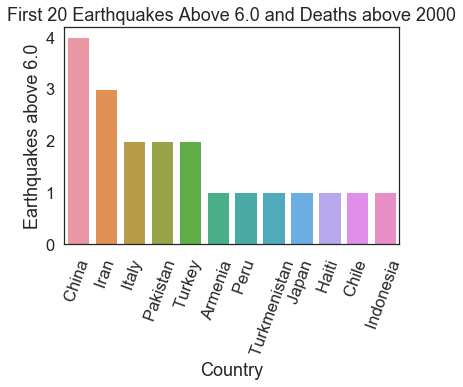

In [31]:
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="white", font_scale=1.5)
s=sns.countplot(data=scat_large, x="Country", order=scat_large['Country'].value_counts().index)
plt.xticks(rotation=70)
plt.ylabel("Earthquakes above 6.0")
plt.title("First 20 Earthquakes Above 6.0 and Deaths above 2000")

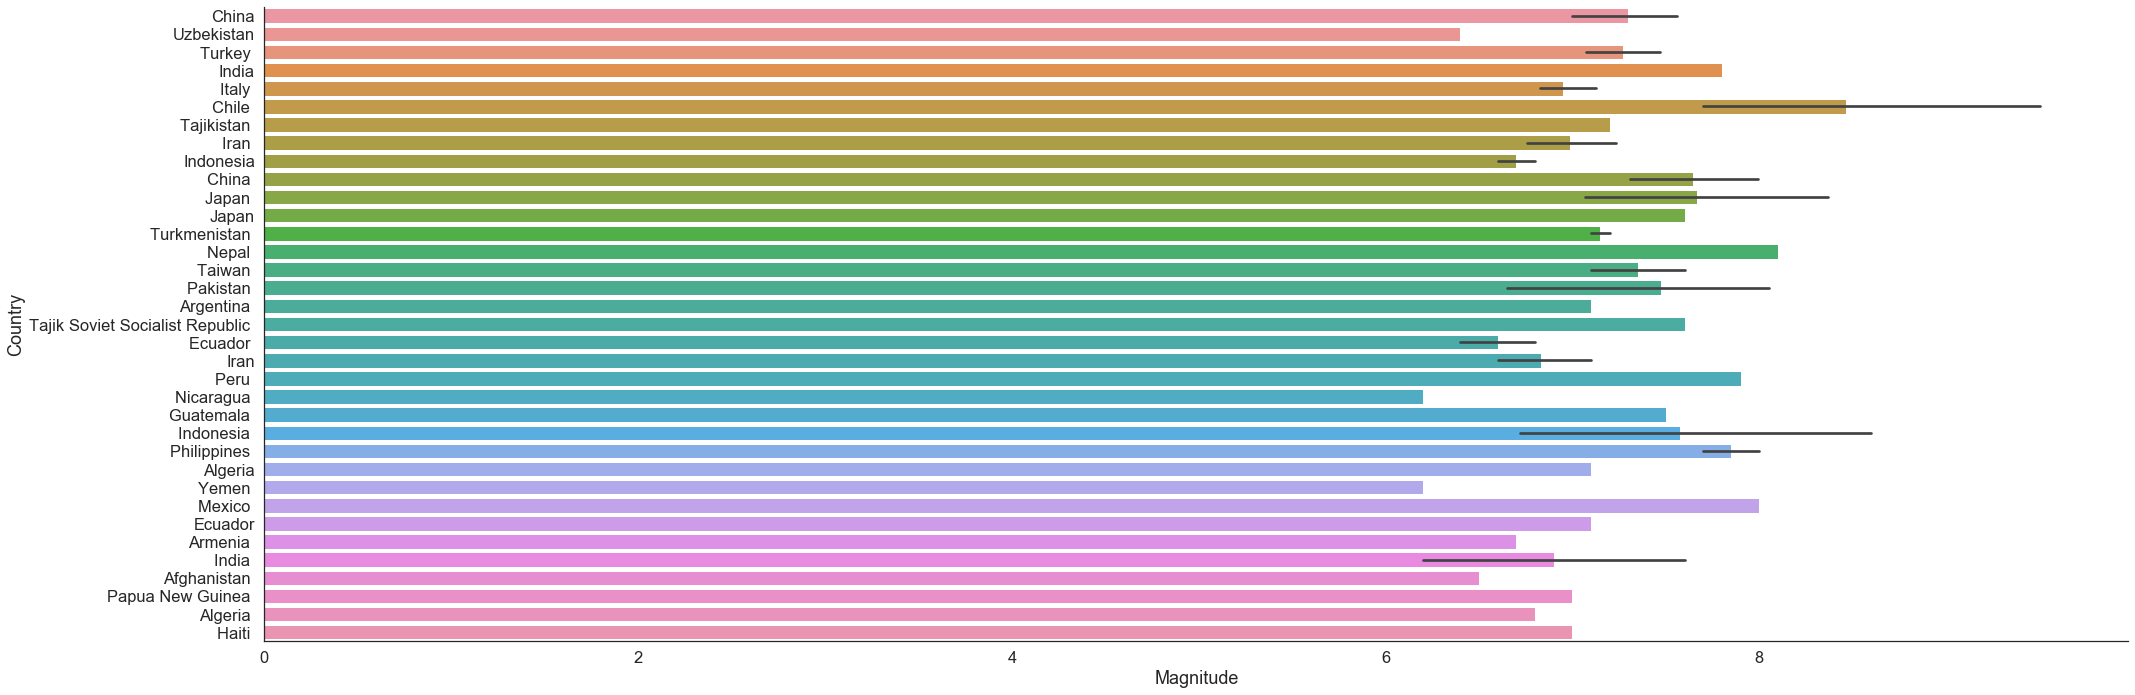

In [32]:
g = sns.catplot(x="Magnitude", y="Country", data=scat_df, kind="bar", height=10, aspect=3) 

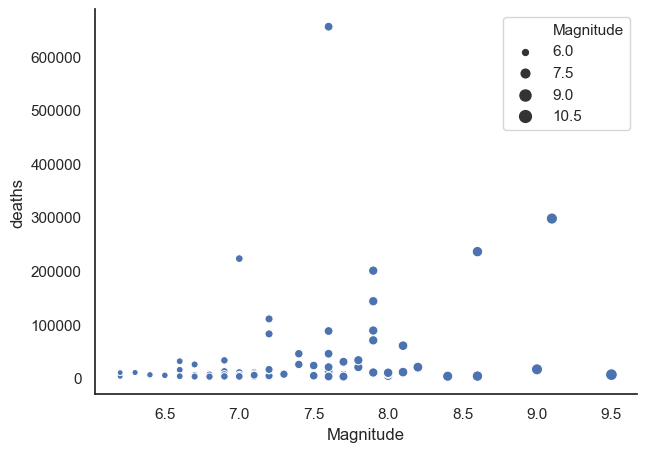

In [33]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white")
sns.scatterplot(
    x='Magnitude',
    y='deaths',
    data=scat_df,
    size='Magnitude')
sns.despine()

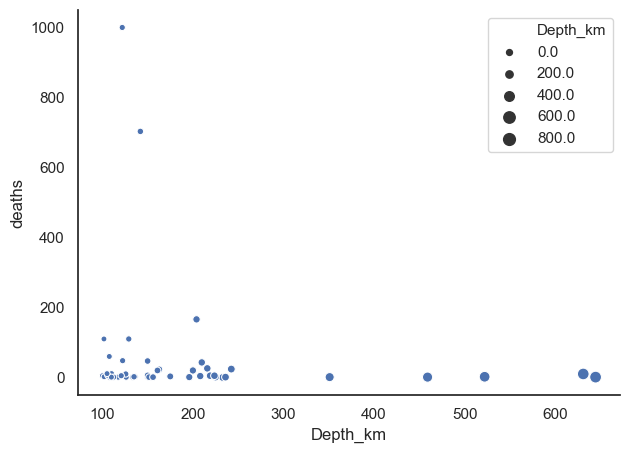

In [34]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white")
sns.scatterplot(
    x='Depth_km',
    y='deaths',
    data=depth_df,
    size='Depth_km')
sns.despine()

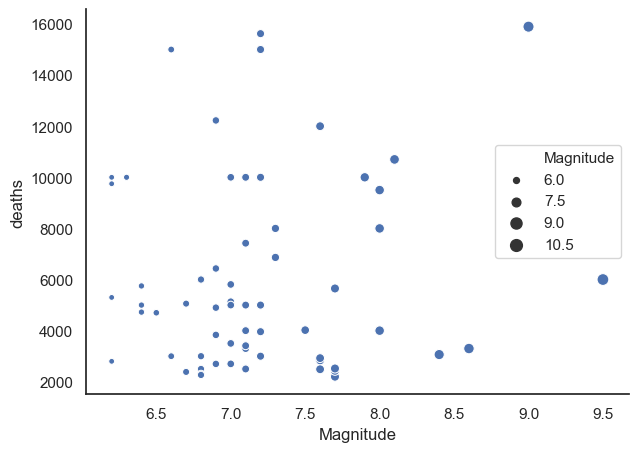

In [35]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white")
sns.scatterplot(
    x='Magnitude',
    y='deaths',
    data=deaths_df,
    size='Magnitude')
sns.despine()

https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



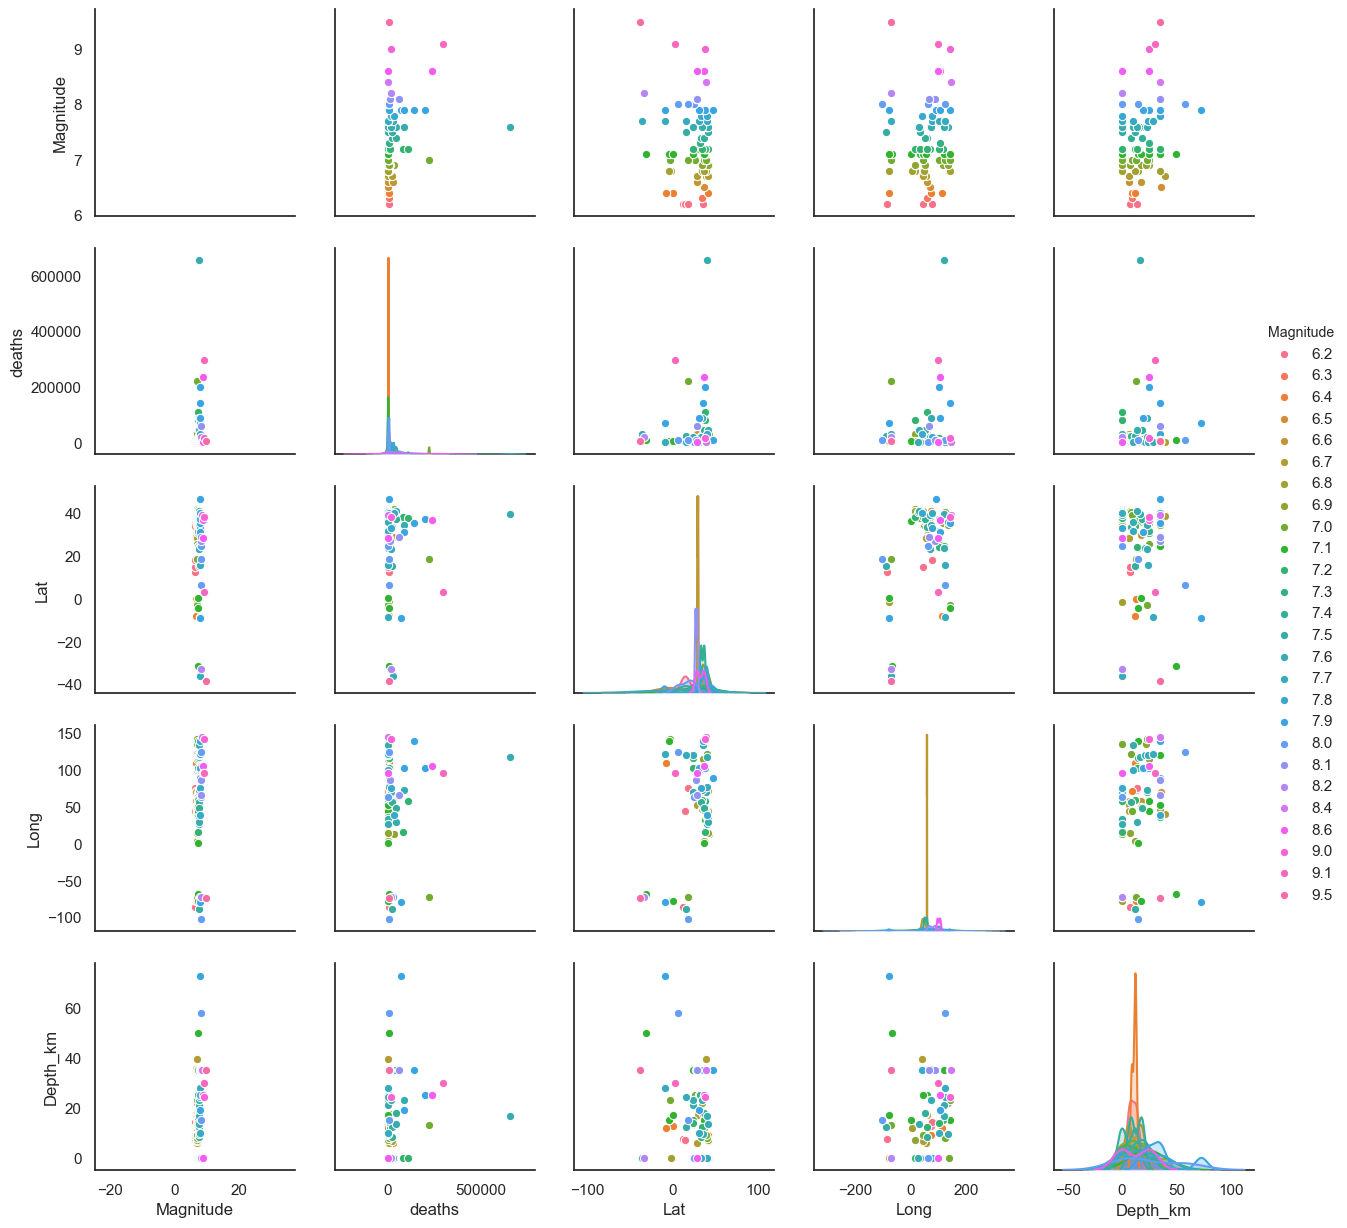

In [36]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True)
sns.pairplot(
   scat_df[[
        'Origin_UTC','Magnitude', 
        'deaths','Lat', 
        'Long','Depth_km']].dropna(), 
    hue='Magnitude')

plot one in which Magnitude and geometry points are plotted

use pd.date and time and look for countries with highest earthquake in which year or what time of day on what date- reference-dq2. use this to plot on the map?

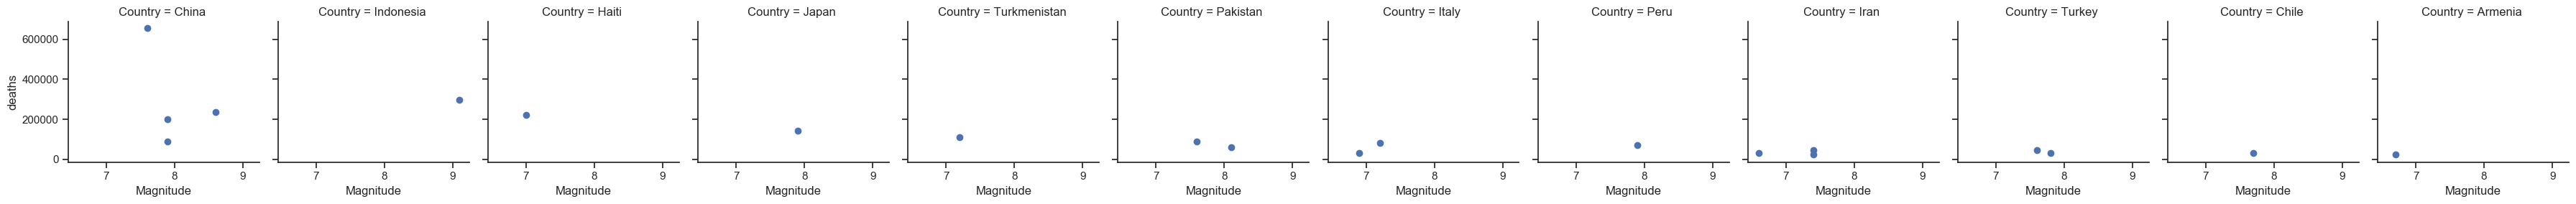

In [37]:
sns.set(style="ticks")
g=sns.FacetGrid(scat_large, col="Country")
g.map(plt.scatter, "Magnitude", "deaths")

plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="white", font_scale=1.5)
plt.figure(figsize=(250,10))
accre_short_usr1=accre_short.query('user == "boyce"')
g = sns.catplot(x="jobid_array", y="jobid", row="user", data=accre_short_usr1, kind="bar", height=5, aspect=3)
plt.xticks(rotation=70)

Use the `requests` library and the USGS's API (https://earthquake.usgs.gov/fdsnws/event/1/) to retrieve information about all recorded earthquakes that occurred in Tennessee since 1900.

In [72]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

In [73]:
payload = {'format': 'csv', 
           'minlatitude':'34.9884', 'maxlatitude':'36.6871', 
           'minlongitude':'-90.3131', 'maxlongitude':'-81.6518', 
          'starttime' : '1900-01-01', 'limit':[1,20000]}

In [74]:
r = requests.get(url=url, params=payload)
r.text[:500]

'time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource\n2019-10-28T05:30:07.850Z,36.274,-89.5046667,7.92,1.51,md,17,86,0.04154,0.07,nm,nm60291576,2019-10-28T12:45:49.390Z,"1km NW of Ridgely, Tennessee",earthquake,0.41,0.79,0.075,12,reviewed,nm,nm\n2019-10-28T02:45:27.350Z,36.439,-89.5245,8.71,1.29,md,21,55,0.0576,0.05,nm,nm60291571,2019-10-28T12:54:16.790Z,"8km NW of Tiptonville, Tennessee",ear'

In [75]:
from io import StringIO
tnquake_df= pd.read_csv(StringIO(r.text))
tnquake_df.head()


time   latitude  longitude  depth   mag magType   nst  \
0  2019-10-28T05:30:07.850Z  36.274000 -89.504667   7.92  1.51      md  17.0   
1  2019-10-28T02:45:27.350Z  36.439000 -89.524500   8.71  1.29      md  21.0   
2  2019-10-27T08:32:04.040Z  36.274667 -89.511833   8.07  1.59      md  12.0   
3  2019-10-27T07:00:21.050Z  36.242000 -89.505000   8.20  2.07      md  28.0   
4  2019-10-27T05:43:36.780Z  36.274000 -89.504667   7.60  1.56      md  17.0   

    gap     dmin   rms  ...                   updated  \
0  86.0  0.04154  0.07  ...  2019-10-28T12:45:49.390Z   
1  55.0  0.05760  0.05  ...  2019-10-28T12:54:16.790Z   
2  85.0  0.04607  0.05  ...  2019-10-27T16:24:23.230Z   
3  35.0  0.06541  0.08  ...  2019-10-28T13:43:00.010Z   
4  69.0  0.04154  0.07  ...  2019-10-28T13:12:15.720Z   

                              place        type horizontalError depthError  \
0      1km NW of Ridgely, Tennessee  earthquake            0.41       0.79   
1  8km NW of Tiptonville, Tennessee  earthquake            0.34       0.51   
2     2km WNW of Ridgely, Tennessee  earthquake            0.41       0.61   
3     2km SSW of Ridgely, Tennessee  earthquake            0.15       0.40   
4      1km NW of Ridgely, Tennessee  earthquake            0.27       0.56   

   magError  magNst    status  locationSource magSource  
0     0.075    12.0  reviewed              nm        nm  
1     0.044     8.0  reviewed              nm        nm  
2     0.046    11.0  reviewed              nm        nm  
3     0.082    20.0  reviewed              nm        nm  
4     0.010    12.0  reviewed              nm        nm  

[5 rows x 22 columns]

How many earthquakes are in the dataset? Which region of Tennessee seems to be the most prone to earthquakes? Which is the least prone?

In [76]:
tnquake_df[tnquake_df['type']=='earthquake'].count()

time               8692
latitude           8692
longitude          8692
depth              8679
mag                8689
magType            8681
nst                5684
gap                5682
dmin               5508
rms                5693
net                8692
id                 8692
updated            8692
place              8692
type               8692
horizontalError    5743
depthError         5742
magError           5663
magNst             5681
status             8692
locationSource     8692
magSource          8692
dtype: int64

In [77]:
tnquake_df['geometry']=tnquake_df.apply(lambda geo: Point((float(geo['longitude']), float(geo['latitude']))), axis=1)
tnquake_df.head()

time   latitude  longitude  depth   mag magType   nst  \
0  2019-10-28T05:30:07.850Z  36.274000 -89.504667   7.92  1.51      md  17.0   
1  2019-10-28T02:45:27.350Z  36.439000 -89.524500   8.71  1.29      md  21.0   
2  2019-10-27T08:32:04.040Z  36.274667 -89.511833   8.07  1.59      md  12.0   
3  2019-10-27T07:00:21.050Z  36.242000 -89.505000   8.20  2.07      md  28.0   
4  2019-10-27T05:43:36.780Z  36.274000 -89.504667   7.60  1.56      md  17.0   

    gap     dmin   rms  ...                             place        type  \
0  86.0  0.04154  0.07  ...      1km NW of Ridgely, Tennessee  earthquake   
1  55.0  0.05760  0.05  ...  8km NW of Tiptonville, Tennessee  earthquake   
2  85.0  0.04607  0.05  ...     2km WNW of Ridgely, Tennessee  earthquake   
3  35.0  0.06541  0.08  ...     2km SSW of Ridgely, Tennessee  earthquake   
4  69.0  0.04154  0.07  ...      1km NW of Ridgely, Tennessee  earthquake   

  horizontalError depthError magError  magNst    status  locationSource  \
0            0.41       0.79    0.075    12.0  reviewed              nm   
1            0.34       0.51    0.044     8.0  reviewed              nm   
2            0.41       0.61    0.046    11.0  reviewed              nm   
3            0.15       0.40    0.082    20.0  reviewed              nm   
4            0.27       0.56    0.010    12.0  reviewed              nm   

   magSource                               geometry  
0         nm             POINT (-89.5046667 36.274)  
1         nm                POINT (-89.5245 36.439)  
2         nm  POINT (-89.51183329999999 36.2746667)  
3         nm                 POINT (-89.505 36.242)  
4         nm             POINT (-89.5046667 36.274)  

[5 rows x 23 columns]

county STATE_NAME STATE_FIPS CNTY_FIPS   FIPS       AREA  POP2000  \
0     Stewart  Tennessee         47       161  47161  493.19726    12370   
1   Robertson  Tennessee         47       147  47147  476.52281    54433   
2      Sumner  Tennessee         47       165  47165  543.32364   130449   
3  Montgomery  Tennessee         47       125  47125  543.83607   134768   
4       Macon  Tennessee         47       111  47111  307.18934    20386   

   POP2001  POP00_SQMI                                           geometry  
0    12833        25.1  POLYGON ((-87.99034 36.360777, -87.99043500000...  
1    56161       114.2  POLYGON ((-87.12044299999999 36.45546, -87.120...  
2   133752       240.1  POLYGON ((-86.22843399999999 36.487472, -86.22...  
3   138524       247.8  POLYGON ((-87.592358 36.367663, -87.59403 36.3...  
4    21029        66.4  POLYGON ((-85.978894 36.426073, -85.989693 36....

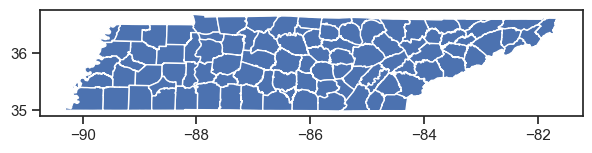

In [78]:
tnmap=gpd.read_file('TN_counties/TN_counties.shp')
tnmap.plot()
tnmap=tnmap.drop(['WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE', 'HISPANIC', 'MALES', 'FEMALES', 'MED_AGE', 'HOUSEHOLDS'], axis=1)
tnmap=tnmap.rename(columns={"NAME": "county"})
tnmap.head()

In [79]:
tnmap.crs

{'init': 'epsg:4269'}

In [80]:
tnmap.columns

Index(['county', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'AREA',
       'POP2000', 'POP2001', 'POP00_SQMI', 'geometry'],
      dtype='object')

In [81]:
tn_geo = gpd.GeoDataFrame(tnquake_df, crs = tnmap.crs, geometry = tnquake_df['geometry'])
tn_geo.columns


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'geometry'],
      dtype='object')

In [82]:
tnmap_tnquake = gpd.sjoin(tn_geo, tnmap, op = 'within')
tnmap_tnquake.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'geometry', 'index_right', 'county',
       'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'AREA', 'POP2000',
       'POP2001', 'POP00_SQMI'],
      dtype='object')

In [83]:
tnquake_df=tnquake_df.fillna(0)

In [84]:
tnquake_df.head()

time   latitude  longitude  depth   mag magType   nst  \
0  2019-10-28T05:30:07.850Z  36.274000 -89.504667   7.92  1.51      md  17.0   
1  2019-10-28T02:45:27.350Z  36.439000 -89.524500   8.71  1.29      md  21.0   
2  2019-10-27T08:32:04.040Z  36.274667 -89.511833   8.07  1.59      md  12.0   
3  2019-10-27T07:00:21.050Z  36.242000 -89.505000   8.20  2.07      md  28.0   
4  2019-10-27T05:43:36.780Z  36.274000 -89.504667   7.60  1.56      md  17.0   

    gap     dmin   rms  ...                             place        type  \
0  86.0  0.04154  0.07  ...      1km NW of Ridgely, Tennessee  earthquake   
1  55.0  0.05760  0.05  ...  8km NW of Tiptonville, Tennessee  earthquake   
2  85.0  0.04607  0.05  ...     2km WNW of Ridgely, Tennessee  earthquake   
3  35.0  0.06541  0.08  ...     2km SSW of Ridgely, Tennessee  earthquake   
4  69.0  0.04154  0.07  ...      1km NW of Ridgely, Tennessee  earthquake   

  horizontalError depthError magError  magNst    status  locationSource  \
0            0.41       0.79    0.075    12.0  reviewed              nm   
1            0.34       0.51    0.044     8.0  reviewed              nm   
2            0.41       0.61    0.046    11.0  reviewed              nm   
3            0.15       0.40    0.082    20.0  reviewed              nm   
4            0.27       0.56    0.010    12.0  reviewed              nm   

   magSource                               geometry  
0         nm             POINT (-89.5046667 36.274)  
1         nm                POINT (-89.5245 36.439)  
2         nm  POINT (-89.51183329999999 36.2746667)  
3         nm                 POINT (-89.505 36.242)  
4         nm             POINT (-89.5046667 36.274)  

[5 rows x 23 columns]

In [87]:
tnmap_poly=tnmap[['geometry', 'county']]

tnmap_poly.head()

geometry      county
0  POLYGON ((-87.99034 36.360777, -87.99043500000...     Stewart
1  POLYGON ((-87.12044299999999 36.45546, -87.120...   Robertson
2  POLYGON ((-86.22843399999999 36.487472, -86.22...      Sumner
3  POLYGON ((-87.592358 36.367663, -87.59403 36.3...  Montgomery
4  POLYGON ((-85.978894 36.426073, -85.989693 36....       Macon

In [68]:
tnquake_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 2 columns):
geometry    8693 non-null object
mag         8693 non-null float64
dtypes: float64(1), object(1)
memory usage: 136.0+ KB


In [65]:
tnmap_tnquake_mag=tnmap_tnquake.loc[:, ['mag', 'county', 'geometry']]
tnmap_tnquake_mag.head()

mag county                               geometry
0  1.51   Lake             POINT (-89.5046667 36.274)
1  1.29   Lake                POINT (-89.5245 36.439)
2  1.59   Lake  POINT (-89.51183329999999 36.2746667)
3  2.07   Lake                 POINT (-89.505 36.242)
4  1.56   Lake             POINT (-89.5046667 36.274)

ax = tnquake_poly.plot(figsize = (12, 12), color = 'lightgreen')
tnmap_tnquake_mag.plot( ax = ax, column = 'county', legend = True);
plt.show()

In [66]:
folium.Map(location = [35.860119, -86.660156], zoom_start = 15)

urban_polygon = neighborhoods.loc[neighborhoods.name == 'Urban Residents']
urban_polygon.head() 
ax = urban_polygon.plot(figsize = (12, 12), color = 'lightgreen')
urban_art.plot( ax = ax, column = 'type', legend = True);

In [91]:
tnmap_poly.geometry.centroid
center = tnmap_poly.geometry.centroid
center_point = center.iloc[0]
print('center is :', type(center))
print('center_point is :', type(center_point))
tnmap_center = [center_point.y, center_point.x]

center is : <class 'geopandas.geoseries.GeoSeries'>
center_point is : <class 'shapely.geometry.point.Point'>


In [92]:
print(tnmap_center)

[36.501175634234045, -87.83852108984728]


In [93]:
map_tn = folium.Map(location =  tnmap_center, zoom_start = 15)
map_tn

In [94]:
for row in tnmap_tnquake_mag.iterrows():
    row_index = row[0]
    row_values = row[1]
    print('index is', row_index)
    print('values are:')
    print(' ')
    print(row_values)
    print('------------------------- ')
    

index is 0
values are:
 
mag                               1.51
county                            Lake
geometry    POINT (-89.5046667 36.274)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
mag                            1.29
county                         Lake
geometry    POINT (-89.5245 36.439)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
mag                                          1.59
county                                       Lake
geometry    POINT (-89.51183329999999 36.2746667)
Name: 2, dtype: object
------------------------- 
index is 3
values are:
 
mag                           2.07
county                        Lake
geometry    POINT (-89.505 36.242)
Name: 3, dtype: object
------------------------- 
index is 4
values are:
 
mag                               1.56
county                            Lake
geometry    POINT (-89.5046667 36.274)
Name: 4, dtype: object
------------------------- 
index is 5
values are:
 
mag

mag                                      1.65
county                                   Lake
geometry    POINT (-89.45233329999999 36.272)
Name: 565, dtype: object
------------------------- 
index is 566
values are:
 
mag                               1.12
county                            Lake
geometry    POINT (-89.5271667 36.334)
Name: 566, dtype: object
------------------------- 
index is 567
values are:
 
mag                                   1.76
county                                Lake
geometry    POINT (-89.5283333 36.3348333)
Name: 567, dtype: object
------------------------- 
index is 568
values are:
 
mag                                1.77
county                             Lake
geometry    POINT (-89.5128333 36.4405)
Name: 568, dtype: object
------------------------- 
index is 571
values are:
 
mag                                   1.15
county                                Lake
geometry    POINT (-89.4661667 36.2491667)
Name: 571, dtype: object
------------------------- 

mag                                          1.25
county                                       Lake
geometry    POINT (-89.44666670000001 36.2776667)
Name: 1421, dtype: object
------------------------- 
index is 1432
values are:
 
mag                                0.85
county                             Lake
geometry    POINT (-89.4771667 36.2945)
Name: 1432, dtype: object
------------------------- 
index is 1433
values are:
 
mag                                0.92
county                             Lake
geometry    POINT (-89.4738333 36.2925)
Name: 1433, dtype: object
------------------------- 
index is 1434
values are:
 
mag                                          0.96
county                                       Lake
geometry    POINT (-89.47399999999999 36.2913333)
Name: 1434, dtype: object
------------------------- 
index is 1436
values are:
 
mag                                   1.12
county                                Lake
geometry    POINT (-89.5336667 36.2653333)
Name: 1

mag                             2.2
county                         Lake
geometry    POINT (-89.5185 36.296)
Name: 2411, dtype: object
------------------------- 
index is 2413
values are:
 
mag                                 0.8
county                             Lake
geometry    POINT (-89.4976667 36.4105)
Name: 2413, dtype: object
------------------------- 
index is 2416
values are:
 
mag                                 1.2
county                             Lake
geometry    POINT (-89.5281667 36.4405)
Name: 2416, dtype: object
------------------------- 
index is 2430
values are:
 
mag                                             1
county                                       Lake
geometry    POINT (-89.49850000000001 36.2738333)
Name: 2430, dtype: object
------------------------- 
index is 2433
values are:
 
mag                                        1.2
county                                    Lake
geometry    POINT (-89.52249999999999 36.4125)
Name: 2433, dtype: object
-----------

mag                                    1.8
county                                Lake
geometry    POINT (-89.4783333 36.2243333)
Name: 3556, dtype: object
------------------------- 
index is 3558
values are:
 
mag                                       1.4
county                                   Lake
geometry    POINT (-89.52116669999999 36.303)
Name: 3558, dtype: object
------------------------- 
index is 3560
values are:
 
mag                                       2.7
county                                   Lake
geometry    POINT (-89.52133329999999 36.302)
Name: 3560, dtype: object
------------------------- 
index is 3581
values are:
 
mag                                        1.6
county                                    Lake
geometry    POINT (-89.4415 36.27133329999999)
Name: 3581, dtype: object
------------------------- 
index is 3582
values are:
 
mag                                             2
county                                       Lake
geometry    POINT (-89.5026667

mag                                           1.8
county                                       Lake
geometry    POINT (-89.52383329999999 36.4256667)
Name: 4502, dtype: object
------------------------- 
index is 4507
values are:
 
mag                                       1.5
county                                   Lake
geometry    POINT (-89.49983329999999 36.459)
Name: 4507, dtype: object
------------------------- 
index is 4510
values are:
 
mag                                 1.5
county                             Lake
geometry    POINT (-89.4825 36.4283333)
Name: 4510, dtype: object
------------------------- 
index is 4511
values are:
 
mag                                    1.4
county                                Lake
geometry    POINT (-89.5131667 36.4856667)
Name: 4511, dtype: object
------------------------- 
index is 4512
values are:
 
mag                                    1.9
county                                Lake
geometry    POINT (-89.5011667 36.2766667)
Name: 4512

mag                                    1.1
county                                Lake
geometry    POINT (-89.5083333 36.4301667)
Name: 5303, dtype: object
------------------------- 
index is 5304
values are:
 
mag                                 1.5
county                             Lake
geometry    POINT (-89.4718333 36.2915)
Name: 5304, dtype: object
------------------------- 
index is 5305
values are:
 
mag                                    0.8
county                                Lake
geometry    POINT (-89.5068333 36.2776667)
Name: 5305, dtype: object
------------------------- 
index is 5307
values are:
 
mag                                 1.5
county                             Lake
geometry    POINT (-89.5221667 36.4095)
Name: 5307, dtype: object
------------------------- 
index is 5308
values are:
 
mag                                      2
county                                Lake
geometry    POINT (-89.5133333 36.2996667)
Name: 5308, dtype: object
-----------------------

mag                            1.8
county                        Lake
geometry    POINT (-89.508 36.391)
Name: 6098, dtype: object
------------------------- 
index is 6105
values are:
 
mag                          1.6
county                      Lake
geometry    POINT (-89.47 36.26)
Name: 6105, dtype: object
------------------------- 
index is 6107
values are:
 
mag                                       1.8
county                                   Lake
geometry    POINT (-89.49299999999999 36.266)
Name: 6107, dtype: object
------------------------- 
index is 6108
values are:
 
mag                          1.4
county                      Lake
geometry    POINT (-89.52 36.26)
Name: 6108, dtype: object
------------------------- 
index is 6110
values are:
 
mag                                      1.5
county                                  Lake
geometry    POINT (-89.51000000000001 36.47)
Name: 6110, dtype: object
------------------------- 
index is 6128
values are:
 
mag                

mag                                     2.7
county                                 Lake
geometry    POINT (-89.48999999999999 36.3)
Name: 7189, dtype: object
------------------------- 
index is 7194
values are:
 
mag                         1.4
county                     Lake
geometry    POINT (-89.5 36.43)
Name: 7194, dtype: object
------------------------- 
index is 7202
values are:
 
mag                          1.2
county                      Lake
geometry    POINT (-89.44 36.25)
Name: 7202, dtype: object
------------------------- 
index is 7204
values are:
 
mag                          1.8
county                      Lake
geometry    POINT (-89.42 36.32)
Name: 7204, dtype: object
------------------------- 
index is 7206
values are:
 
mag                          2.8
county                      Lake
geometry    POINT (-89.45 36.25)
Name: 7206, dtype: object
------------------------- 
index is 7213
values are:
 
mag                            1
county                      Lake
geom

mag                            2
county                      Lake
geometry    POINT (-89.64 36.22)
Name: 8246, dtype: object
------------------------- 
index is 8247
values are:
 
mag                          1.6
county                      Lake
geometry    POINT (-89.47 36.28)
Name: 8247, dtype: object
------------------------- 
index is 8251
values are:
 
mag                                      1.7
county                                  Lake
geometry    POINT (-89.51000000000001 36.42)
Name: 8251, dtype: object
------------------------- 
index is 8262
values are:
 
mag                                      1.5
county                                  Lake
geometry    POINT (-89.51000000000001 36.28)
Name: 8262, dtype: object
------------------------- 
index is 8263
values are:
 
mag                          1.8
county                      Lake
geometry    POINT (-89.45 36.26)
Name: 8263, dtype: object
------------------------- 
index is 8266
values are:
 
mag                         

mag                                    2.8
county                             Bradley
geometry    POINT (-84.8118333 34.9946667)
Name: 2311, dtype: object
------------------------- 
index is 2344
values are:
 
mag                                    2.3
county                             Bradley
geometry    POINT (-84.9961667 35.0791667)
Name: 2344, dtype: object
------------------------- 
index is 2680
values are:
 
mag                                       1.8
county                                Bradley
geometry    POINT (-84.87100000000001 35.145)
Name: 2680, dtype: object
------------------------- 
index is 3162
values are:
 
mag                                    1.2
county                             Bradley
geometry    POINT (-84.8636667 35.1343333)
Name: 3162, dtype: object
------------------------- 
index is 3194
values are:
 
mag                                    0.7
county                             Bradley
geometry    POINT (-84.8281667 35.2101667)
Name: 3194, dtype: obj

mag                                   3.69
county                                Dyer
geometry    POINT (-89.4398333 36.1358333)
Name: 229, dtype: object
------------------------- 
index is 239
values are:
 
mag                                   2.51
county                                Dyer
geometry    POINT (-89.4601667 36.2081667)
Name: 239, dtype: object
------------------------- 
index is 244
values are:
 
mag                                      1.49
county                                   Dyer
geometry    POINT (-89.36150000000001 36.186)
Name: 244, dtype: object
------------------------- 
index is 246
values are:
 
mag                                1.65
county                             Dyer
geometry    POINT (-89.4725 36.2091667)
Name: 246, dtype: object
------------------------- 
index is 259
values are:
 
mag                                2.59
county                             Dyer
geometry    POINT (-89.4265 36.1236667)
Name: 259, dtype: object
-----------------------

mag                                           1.5
county                                       Dyer
geometry    POINT (-89.46600000000001 36.2086667)
Name: 3768, dtype: object
------------------------- 
index is 3770
values are:
 
mag                                           1.9
county                                       Dyer
geometry    POINT (-89.43166670000001 36.0828333)
Name: 3770, dtype: object
------------------------- 
index is 3823
values are:
 
mag                                      1.2
county                                  Dyer
geometry    POINT (-89.46733329999999 36.21)
Name: 3823, dtype: object
------------------------- 
index is 3886
values are:
 
mag                                    1.5
county                                Dyer
geometry    POINT (-89.4178333 36.1298333)
Name: 3886, dtype: object
------------------------- 
index is 3887
values are:
 
mag                                    2.7
county                                Dyer
geometry    POINT (-89.409

mag                           1.2
county                       Dyer
geometry    POINT (-89.441 36.16)
Name: 6354, dtype: object
------------------------- 
index is 6367
values are:
 
mag                                       2.5
county                                   Dyer
geometry    POINT (-89.42299999999999 36.196)
Name: 6367, dtype: object
------------------------- 
index is 6374
values are:
 
mag                          1.4
county                      Dyer
geometry    POINT (-89.42 36.18)
Name: 6374, dtype: object
------------------------- 
index is 6386
values are:
 
mag                          1.2
county                      Dyer
geometry    POINT (-89.44 36.17)
Name: 6386, dtype: object
------------------------- 
index is 6390
values are:
 
mag                            1.9
county                        Dyer
geometry    POINT (-89.495 36.155)
Name: 6390, dtype: object
------------------------- 
index is 6395
values are:
 
mag                            1.4
county           

mag                                   2.94
county                               Obion
geometry    POINT (-89.4131667 36.2178333)
Name: 1889, dtype: object
------------------------- 
index is 1894
values are:
 
mag                                          1.29
county                                      Obion
geometry    POINT (-89.41633330000001 36.2376667)
Name: 1894, dtype: object
------------------------- 
index is 1911
values are:
 
mag                                       1.74
county                                   Obion
geometry    POINT (-89.30033330000001 36.2645)
Name: 1911, dtype: object
------------------------- 
index is 1950
values are:
 
mag                                   1.28
county                               Obion
geometry    POINT (-89.4628333 36.2141667)
Name: 1950, dtype: object
------------------------- 
index is 1968
values are:
 
mag                             2.09
county                         Obion
geometry    POINT (-89.4425 36.2335)
Name: 1968, dtyp

mag                          1.5
county                     Obion
geometry    POINT (-89.44 36.22)
Name: 6047, dtype: object
------------------------- 
index is 6049
values are:
 
mag                          1.5
county                     Obion
geometry    POINT (-89.37 36.22)
Name: 6049, dtype: object
------------------------- 
index is 6061
values are:
 
mag                                       1.7
county                                  Obion
geometry    POINT (-89.45100000000001 36.225)
Name: 6061, dtype: object
------------------------- 
index is 6078
values are:
 
mag                                                  1.3
county                                             Obion
geometry    POINT (-89.42700000000001 36.23699999999999)
Name: 6078, dtype: object
------------------------- 
index is 6090
values are:
 
mag                          1.4
county                     Obion
geometry    POINT (-89.41 36.22)
Name: 6090, dtype: object
------------------------- 
index is 6092
val

mag                                    0.7
county                                Polk
geometry    POINT (-84.4531667 35.2141667)
Name: 3364, dtype: object
------------------------- 
index is 3645
values are:
 
mag                                           1.1
county                                       Polk
geometry    POINT (-84.63549999999999 35.0581667)
Name: 3645, dtype: object
------------------------- 
index is 4219
values are:
 
mag                                 0.8
county                             Polk
geometry    POINT (-84.5915 35.2173333)
Name: 4219, dtype: object
------------------------- 
index is 4349
values are:
 
mag                                    2.3
county                                Polk
geometry    POINT (-84.7313333 35.0741667)
Name: 4349, dtype: object
------------------------- 
index is 7225
values are:
 
mag                            2.8
county                        Polk
geometry    POINT (-84.521 35.202)
Name: 7225, dtype: object
-----------------

mag                               2.27
county                           Roane
geometry    POINT (-84.4383333 35.872)
Name: 1595, dtype: object
------------------------- 
index is 2351
values are:
 
mag                                    2.2
county                               Roane
geometry    POINT (-84.5053333 35.7193333)
Name: 2351, dtype: object
------------------------- 
index is 2371
values are:
 
mag                                    1.9
county                               Roane
geometry    POINT (-84.5573333 35.7301667)
Name: 2371, dtype: object
------------------------- 
index is 2470
values are:
 
mag                                2.2
county                           Roane
geometry    POINT (-84.3553333 35.906)
Name: 2470, dtype: object
------------------------- 
index is 2551
values are:
 
mag                                       1.5
county                                  Roane
geometry    POINT (-84.69366670000001 35.733)
Name: 2551, dtype: object
--------------------

mag                                   2.23
county                            Anderson
geometry    POINT (-84.2668333 36.0608333)
Name: 1365, dtype: object
------------------------- 
index is 2612
values are:
 
mag                              1.6
county                      Anderson
geometry    POINT (-84.00367 36.207)
Name: 2612, dtype: object
------------------------- 
index is 3786
values are:
 
mag                                    1.6
county                            Anderson
geometry    POINT (-84.2791667 36.1546667)
Name: 3786, dtype: object
------------------------- 
index is 1217
values are:
 
mag                                   1.87
county                              Tipton
geometry    POINT (-89.9838333 35.4881667)
Name: 1217, dtype: object
------------------------- 
index is 4579
values are:
 
mag                                           1.6
county                                     Tipton
geometry    POINT (-89.99433329999999 35.4723333)
Name: 4579, dtype: object
--

In [95]:
tnmap_poly.to_file('tnmap_poly.geojson', driver = 'GeoJSON')

GeometryTypeValidationError: Record's geometry type does not match collection schema's geometry type: 'MultiPolygon' != 'Polygon'